In [1]:
# Célula 1: Importações

import numpy as np
import pandas as pd
import time
from scipy.spatial import Voronoi
import matplotlib.pyplot as plt
import seaborn as sns

# Configurações de estilo para os gráficos
sns.set_theme(style="whitegrid", palette="viridis")
print("Bibliotecas importadas com sucesso!")

Bibliotecas importadas com sucesso!


Iniciando análise de crescimento... Isso pode levar um minuto.
Análise de crescimento concluída.


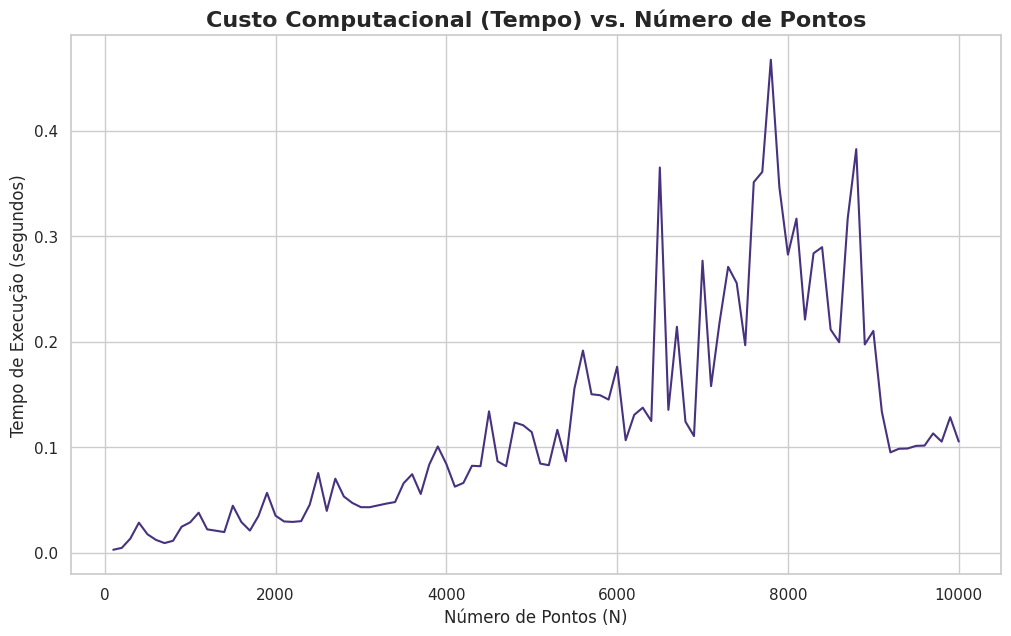

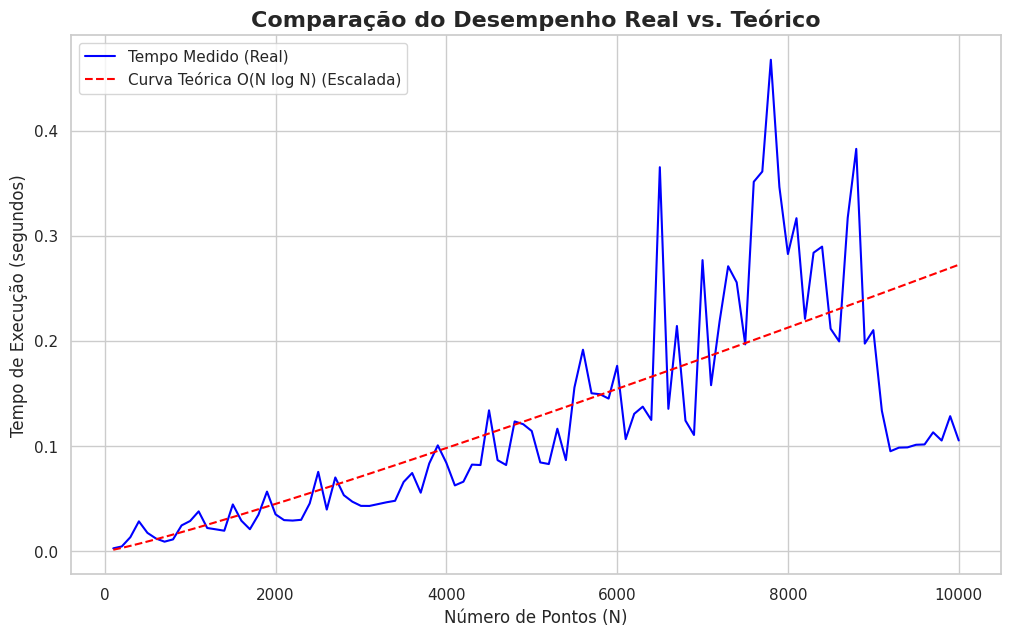

In [2]:
# Célula 2: Custo vs. Número de Pontos

# Lista para armazenar os resultados (número de pontos, tempo)
results_growth = []

# Define a faixa de pontos que vamos testar
# Começamos com 100 e vamos até 10.000, de 100 em 100.
point_counts = range(100, 10001, 100)

print("Iniciando análise de crescimento... Isso pode levar um minuto.")

for n in point_counts:
    # Gera 'n' pontos distribuídos aleatoriamente em um quadrado 1x1
    points = np.random.rand(n, 2)

    # Mede o tempo de execução
    start_time = time.perf_counter()
    vor = Voronoi(points)
    end_time = time.perf_counter()

    # Calcula a duração e armazena
    duration = end_time - start_time
    results_growth.append({'num_points': n, 'time_seconds': duration})

# Converte os resultados para um DataFrame do Pandas para facilitar a plotagem
df_growth = pd.DataFrame(results_growth)

print("Análise de crescimento concluída.")

# --- GRÁFICO 1: Tempo de Execução vs. Número de Pontos ---
plt.figure(figsize=(12, 7))
sns.lineplot(data=df_growth, x='num_points', y='time_seconds')
plt.title('Custo Computacional (Tempo) vs. Número de Pontos', fontsize=16, fontweight='bold')
plt.xlabel('Número de Pontos (N)')
plt.ylabel('Tempo de Execução (segundos)')
plt.show()

# --- GRÁFICO 2: Comparação com a Complexidade Teórica O(N log N) ---
# A complexidade de tempo teórica para o algoritmo de Fortune (usado aqui) é O(N log N).
# Vamos comparar nossos resultados práticos com essa curva teórica.

# Calcula a curva N*log(N) para nossos dados
df_growth['n_log_n'] = df_growth['num_points'] * np.log(df_growth['num_points'])

# Para comparar visualmente, escalamos a curva teórica para que ela se ajuste aos nossos dados
# Encontramos um fator de escala médio
scaling_factor = (df_growth['time_seconds'] / df_growth['n_log_n']).mean()
df_growth['theoretical_scaled'] = df_growth['n_log_n'] * scaling_factor

plt.figure(figsize=(12, 7))
sns.lineplot(data=df_growth, x='num_points', y='time_seconds', label='Tempo Medido (Real)', color='blue')
sns.lineplot(data=df_growth, x='num_points', y='theoretical_scaled', label='Curva Teórica O(N log N) (Escalada)', color='red', linestyle='--')
plt.title('Comparação do Desempenho Real vs. Teórico', fontsize=16, fontweight='bold')
plt.xlabel('Número de Pontos (N)')
plt.ylabel('Tempo de Execução (segundos)')
plt.legend()
plt.show()

Iniciando análise de distribuição com 8000 pontos...
Análise de distribuição concluída.


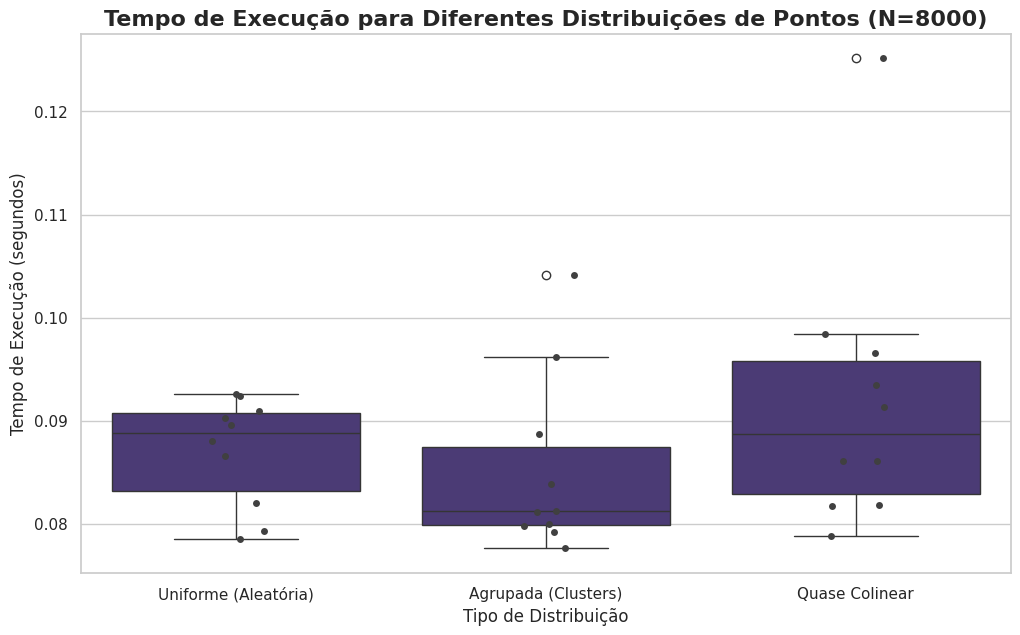

In [3]:
# Célula 3: Custo vs. Distribuição dos Pontos

# Número fixo de pontos para o teste, para que a comparação seja justa
NUM_POINTS_DIST = 8000
# Quantas vezes repetimos cada teste para obter uma média estável
NUM_REPETITIONS = 10

results_dist = []

print(f"Iniciando análise de distribuição com {NUM_POINTS_DIST} pontos...")

for i in range(NUM_REPETITIONS):
    # 1. Distribuição Uniforme (aleatória)
    points_uniform = np.random.rand(NUM_POINTS_DIST, 2)
    start_time = time.perf_counter()
    Voronoi(points_uniform)
    duration = time.perf_counter() - start_time
    results_dist.append({'distribution': 'Uniforme (Aleatória)', 'time_seconds': duration})

    # 2. Distribuição Agrupada (clusters)
    # Criamos 3 centros e distribuímos os pontos ao redor deles
    points_c1 = np.random.randn(NUM_POINTS_DIST // 3, 2) * 0.1 + [0.25, 0.25]
    points_c2 = np.random.randn(NUM_POINTS_DIST // 3, 2) * 0.1 + [0.75, 0.75]
    points_c3 = np.random.randn(NUM_POINTS_DIST - 2 * (NUM_POINTS_DIST // 3), 2) * 0.1 + [0.25, 0.75]
    points_clustered = np.vstack([points_c1, points_c2, points_c3])
    start_time = time.perf_counter()
    Voronoi(points_clustered)
    duration = time.perf_counter() - start_time
    results_dist.append({'distribution': 'Agrupada (Clusters)', 'time_seconds': duration})

    # 3. Distribuição Colinear (pontos quase em linha)
    # Casos degenerados como este podem ser desafiadores para algoritmos geométricos
    x = np.random.rand(NUM_POINTS_DIST, 1)
    y = x * 0.1 + 0.45 + np.random.randn(NUM_POINTS_DIST, 1) * 0.01 # y = 0.1x + 0.45 + ruído
    points_line = np.hstack([x, y])
    start_time = time.perf_counter()
    Voronoi(points_line)
    duration = time.perf_counter() - start_time
    results_dist.append({'distribution': 'Quase Colinear', 'time_seconds': duration})

df_dist = pd.DataFrame(results_dist)
print("Análise de distribuição concluída.")

# --- GRÁFICO 3: Boxplot comparando as distribuições ---
plt.figure(figsize=(12, 7))
sns.boxplot(data=df_dist, x='distribution', y='time_seconds')
sns.stripplot(data=df_dist, x='distribution', y='time_seconds', color=".25") # Adiciona os pontos individuais
plt.title(f'Tempo de Execução para Diferentes Distribuições de Pontos (N={NUM_POINTS_DIST})', fontsize=16, fontweight='bold')
plt.xlabel('Tipo de Distribuição')
plt.ylabel('Tempo de Execução (segundos)')
plt.show()

Iniciando análise do tamanho da saída...
Análise de saída concluída.


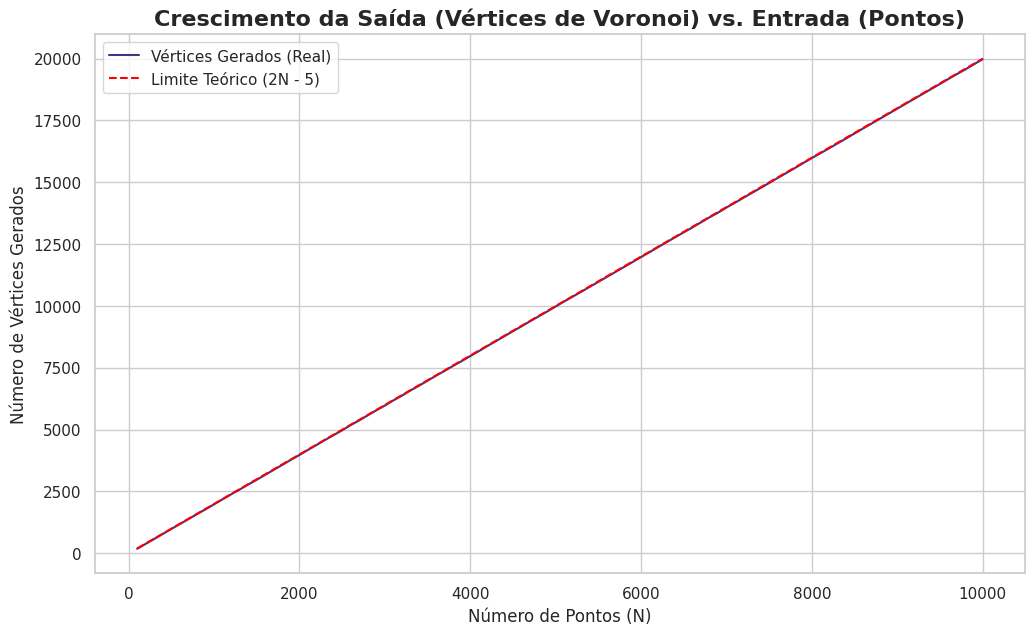

In [4]:
# Célula 4: Análise do Tamanho da Saída

results_output = []

print("Iniciando análise do tamanho da saída...")

for n in point_counts: # Reutiliza a mesma faixa de pontos da análise 1
    points = np.random.rand(n, 2)

    vor = Voronoi(points)

    # Armazena o número de pontos de entrada e o número de vértices de saída
    results_output.append({'num_points': n, 'num_voronoi_vertices': len(vor.vertices)})

df_output = pd.DataFrame(results_output)
print("Análise de saída concluída.")

# --- GRÁFICO 4: Número de Vértices vs. Número de Pontos ---
plt.figure(figsize=(12, 7))
sns.lineplot(data=df_output, x='num_points', y='num_voronoi_vertices', label='Vértices Gerados (Real)')

# Adiciona a linha teórica do limite superior (2N - 5) para comparação
df_output['theoretical_bound'] = 2 * df_output['num_points'] - 5
sns.lineplot(data=df_output, x='num_points', y='theoretical_bound', label='Limite Teórico (2N - 5)', color='red', linestyle='--')

plt.title('Crescimento da Saída (Vértices de Voronoi) vs. Entrada (Pontos)', fontsize=16, fontweight='bold')
plt.xlabel('Número de Pontos (N)')
plt.ylabel('Número de Vértices Gerados')
plt.legend()
plt.show()